In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

<pre>Age: The age of the patient (numeric).
Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).
Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).
Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).
Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).
High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).
Platelets: Platelet count in the blood (numeric).
Serum Creatinine: Level of creatinine in the blood (numeric).
Serum Sodium: Level of sodium in the blood (numeric).
Sex: Gender of the patient (binary: 0 for female, 1 for male).
Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).
Time: Follow-up period (in days) for the patient's condition (numeric).</pre>

<pre>1 What is the distribution of age among heart failure patients in the dataset?
2 How does the death rate vary with age?
3 What is the percentage of male and female patients in the dataset?
4 How does the platelet count vary among different age groups
5 Is there a correlation between creatinine and sodium levels in the blood?
6 How does the prevalence of high blood pressure differ between male and female patients
7 What is the relationship between smoking habits and the occurrence of heart failure
8 Are there any noticeable patterns in the distribution of death events across different age groups
9 Is there any significant difference in ejection fraction between patients with and without diabetes
10 How does the serum creatinine level vary between patients who survived and those who did not?
</pre>

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# 2 How does the death rate vary with age?

In [5]:
df.groupby('age')['DEATH_EVENT'].count().head(3)

age
40.0    7
41.0    1
42.0    7
Name: DEATH_EVENT, dtype: int64

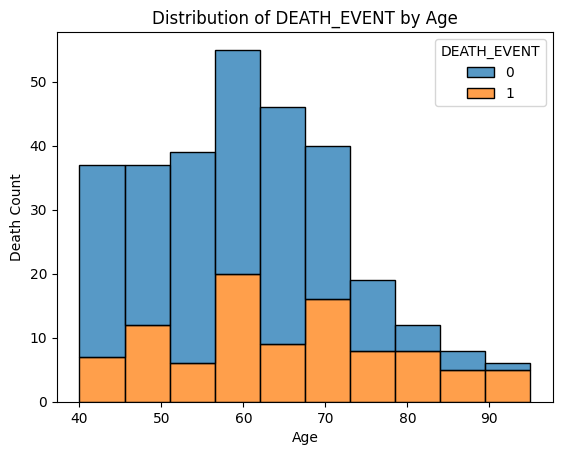

In [6]:
# Plotting the distribution graph
sns.histplot(data=df.sort_index(), x=df.age.sort_values(), hue='DEATH_EVENT', multiple='stack')
plt.title('Distribution of DEATH_EVENT by Age')
plt.xlabel('Age')
plt.ylabel('Death Count')
plt.show()

In [7]:
# 3 What is the percentage of male and female patients in the dataset? 1 = male, 0 = Female
df[df.sex == 1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.00,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
# Counting the occurrences of each gender
gender_counts = df['sex'].value_counts()

# Calculating percentages
total_patients = gender_counts.sum()
male_percentage = (gender_counts[1] / total_patients) * 100
female_percentage = (gender_counts[0] / total_patients) * 100

print(f"Percentage of male patients: {male_percentage:.2f}%")
print(f"Percentage of female patients: {female_percentage:.2f}%")

Percentage of male patients: 64.88%
Percentage of female patients: 35.12%


In [9]:
df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

In [10]:
# 4 How does the platelet count vary among different age groups
x = df.groupby('age')['platelets'].mean()

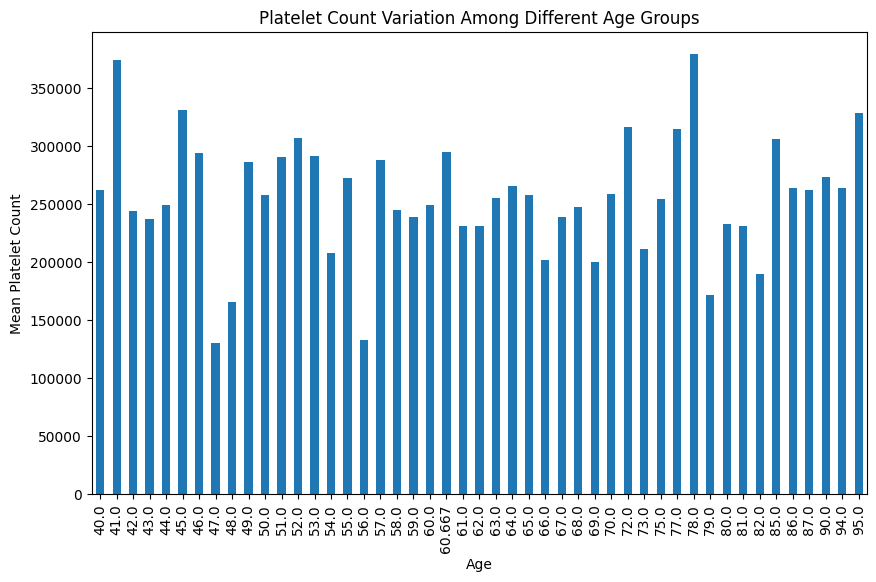

In [11]:
# Plotting the platelet count variation among different age groups
plt.figure(figsize=(10, 6))
x.plot(kind='bar')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Mean Platelet Count')
plt.show()

In [12]:
# 5 Is there a correlation between creatinine and sodium levels in the blood?
df['creatinine_phosphokinase'].corr(df['serum_sodium'])

0.05955015583372572

<pre>The Pearson correlation coefficient, often denoted by the symbol \( r \), is a measure of the linear relationship between two variables. It's calculated by dividing the covariance of the two variables by the product of their standard deviations. Mathematically, the Pearson correlation coefficient between two variables \( X \) and \( Y \) is given by the formula:
</pre>

<pre>
Where:
- \( X_i \) and \( Y_i \) are the individual data points of variables \( X \) and \( Y \) respectively.
- \( \bar{X} \) and \( \bar{Y} \) are the means of variables \( X \) and \( Y \) respectively.
- \( n \) is the number of data points.

Here's a step-by-step explanation of how the calculation works:
1. Calculate the mean (\( \bar{X} \)) and standard deviation (\( \sigma_X \)) of variable \( X \).
2. Calculate the mean (\( \bar{Y} \)) and standard deviation (\( \sigma_Y \)) of variable \( Y \).
3. Compute the differences between each data point and the mean for both variables: \( X_i - \bar{X} \) and \( Y_i - \bar{Y} \).
4. Multiply the differences for each pair of data points: \( (X_i - \bar{X})(Y_i - \bar{Y}) \).
5. Sum up all the products obtained in step 4.
6. Divide the result from step 5 by the product of the standard deviations (\( \sigma_X \) and \( \sigma_Y \)) to get the covariance.
7. Divide the covariance by the product of the standard deviations (\( \sigma_X \) and \( \sigma_Y \)) to get the correlation coefficient \( r \).

The resulting value of \( r \) will lie between -1 and 1, where:
- \( r = 1 \) indicates a perfect positive linear relationship.
- \( r = -1 \) indicates a perfect negative linear relationship.
- \( r = 0 \) indicates no linear relationship.

This correlation coefficient helps in understanding the direction and strength of the linear relationship between the two variables. However, it's important to remember that correlation does not imply causation.</pre>

In [13]:
# 6 How does the prevalence of high blood pressure differ between male and female patients?
df.groupby('sex')['high_blood_pressure'].value_counts(normalize=True)*100

sex  high_blood_pressure
0    0                      58.095238
     1                      41.904762
1    0                      68.556701
     1                      31.443299
Name: proportion, dtype: float64

#### Above output shows
<pre>sex  high_blood_pressure
0    0                      58.095238 [58% of females don't have high blood pressure]
     1                      41.904762 [41% of females have high blood pressure]
1    0                      68.556701 [68% of males don't have high blood pressure]
     1                      31.443299 [31% of males have high blood pressure]
Name: proportion, dtype: float64</pre>

In [14]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [15]:
# 7 What is the relationship between smoking habits and the occurrence of heart failure
print(df.groupby('sex')[['smoking','DEATH_EVENT']].value_counts(normalize=True)*100)

sex  smoking  DEATH_EVENT
0    0        0              66.666667
              1              29.523810
     1        1               2.857143
              0               0.952381
1    0        0              34.536082
     1        0              33.505155
     0        1              18.041237
     1        1              13.917526
Name: proportion, dtype: float64


#### Above output shows
<pre>| sex | smoking | DEATH_EVENT | Explanation |
|-----|---------|-------------|-------------|
| 0   | 0       | 66.67       | For females who don't smoke, there's a 66.67% chance of survival or not experiencing a cardiac event. |
| 0   | 1       | 29.52       | For females who smoke, there's a 29.52% chance of experiencing a cardiac event. |
| 1   | 1       | 2.86        | For females who smoke, there's a 2.86% chance of survival or not experiencing a cardiac event. |
| 1   | 0       | 0.95        | For females who don't smoke, there's a 0.95% chance of experiencing a cardiac event. |
| 1   | 0       | 34.54       | For males who don't smoke, there's a 34.54% chance of survival or not experiencing a cardiac event. |
| 1   | 1       | 33.51       | For males who don't smoke, there's a 33.51% chance of survival or not experiencing a cardiac event. |
| 0   | 1       | 18.04       | For males who smoke, there's an 18.04% chance of survival or not experiencing a cardiac event. |
| 0   | 0       | 13.92       | For males who smoke, there's a 13.92% chance of experiencing a cardiac event. |
</pre>

In [16]:
# 8 Are there any noticeable patterns in the distribution of death events across different age groups
xx = pd.DataFrame(df[df.age.between(40,50)].groupby('age')['DEATH_EVENT'].value_counts(normalize=True)*100)
xx.columns

Index(['proportion'], dtype='object')

age  DEATH_EVENT
40   0              100.000000
41   0              100.000000
42   0               85.714286
     1               14.285714
43   0              100.000000
44   0              100.000000
45   0               68.421053
     1               31.578947
46   0               66.666667
     1               33.333333
47   0              100.000000
48   1              100.000000
49   0               75.000000
     1               25.000000
50   0               70.370370
     1               29.629630
there are 

In [17]:
df[df.age.between(50,60)].groupby('age')['DEATH_EVENT'].value_counts(normalize=True)*100

age   DEATH_EVENT
50.0  0               70.370370
      1               29.629630
51.0  0               75.000000
      1               25.000000
52.0  0              100.000000
53.0  0               90.000000
      1               10.000000
54.0  0               50.000000
      1               50.000000
55.0  0               82.352941
      1               17.647059
56.0  0              100.000000
57.0  0               50.000000
      1               50.000000
58.0  0               80.000000
      1               20.000000
59.0  1               75.000000
      0               25.000000
60.0  0               60.606061
      1               39.393939
Name: proportion, dtype: float64

In [18]:
df[df.age.between(60,70)].groupby('age')['DEATH_EVENT'].value_counts(normalize=True)*100

age     DEATH_EVENT
60.000  0               60.606061
        1               39.393939
60.667  0               50.000000
        1               50.000000
61.000  0              100.000000
62.000  0               80.000000
        1               20.000000
63.000  0              100.000000
64.000  0              100.000000
65.000  0               69.230769
        1               30.769231
66.000  0              100.000000
67.000  0              100.000000
68.000  0               60.000000
        1               40.000000
69.000  1               66.666667
        0               33.333333
70.000  0               72.000000
        1               28.000000
Name: proportion, dtype: float64

In [19]:
df[df.age.between(70,80)].groupby('age')['DEATH_EVENT'].value_counts(normalize=True)*100

age   DEATH_EVENT
70.0  0               72.000000
      1               28.000000
72.0  1               71.428571
      0               28.571429
73.0  0               75.000000
      1               25.000000
75.0  1               54.545455
      0               45.454545
77.0  0               50.000000
      1               50.000000
78.0  0              100.000000
79.0  0              100.000000
80.0  1               71.428571
      0               28.571429
Name: proportion, dtype: float64

In [20]:
df[df.age.between(80,90)].groupby('age')['DEATH_EVENT'].value_counts(normalize=True)*100

age   DEATH_EVENT
80.0  1               71.428571
      0               28.571429
81.0  0              100.000000
82.0  1              100.000000
85.0  0               50.000000
      1               50.000000
86.0  1              100.000000
87.0  1              100.000000
90.0  1               66.666667
      0               33.333333
Name: proportion, dtype: float64

In [21]:
age_range_survival = df[df.age.between(70, 80)].groupby('age')['DEATH_EVENT'].value_counts(normalize=True) * 100

# Extracting the percentage of survivors (DEATH_EVENT = 0) within the age range
percent_survived = age_range_survival.loc[(slice(None), 0)]

# Calculating the total percentage of survivors within the age range
total_percent_survived = percent_survived.sum()

print(f"Total percentage of survivors between ages 70 to 80: {total_percent_survived:.2f}%")


Total percentage of survivors between ages 70 to 80: 499.60%


In [22]:
# 9 Is there any significant difference in ejection fraction between patients with and without diabetes
# Separate ejection fraction data for patients with and without diabetes
from scipy import stats

ejection_fraction_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(ejection_fraction_diabetes, ejection_fraction_no_diabetes)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.08358970647234736
P-Value: 0.9334389630426103


In [23]:
# 10 How does the serum creatinine level vary between patients who survived and those who did not?

- Descriptive Statistics

In [24]:
# Separate serum creatinine data for patients who survived and those who did not
serum_creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
serum_creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

# Descriptive Statistics
print("Survived - Serum Creatinine Statistics:")
print(serum_creatinine_survived.describe())
print("\nNot Survived - Serum Creatinine Statistics:")
print(serum_creatinine_not_survived.describe())


Survived - Serum Creatinine Statistics:
count    203.000000
mean       1.184877
std        0.654083
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: serum_creatinine, dtype: float64

Not Survived - Serum Creatinine Statistics:
count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: serum_creatinine, dtype: float64


- Boxplot

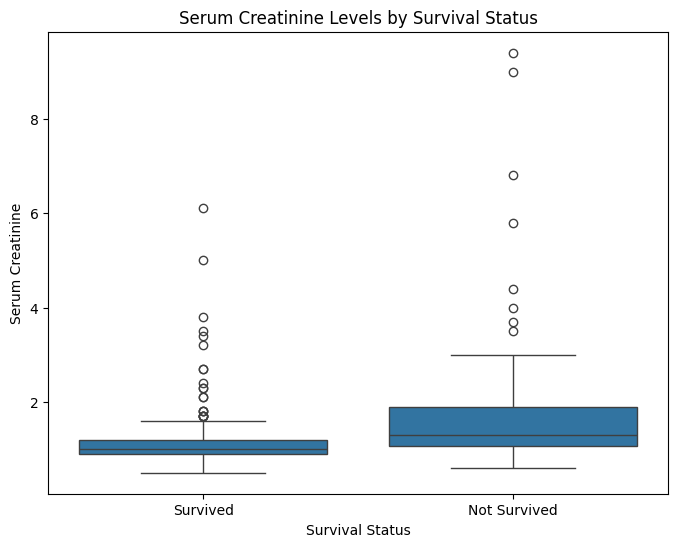

In [25]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Serum Creatinine')
plt.xticks([0, 1], ['Survived', 'Not Survived'])
plt.show()



- Histograms

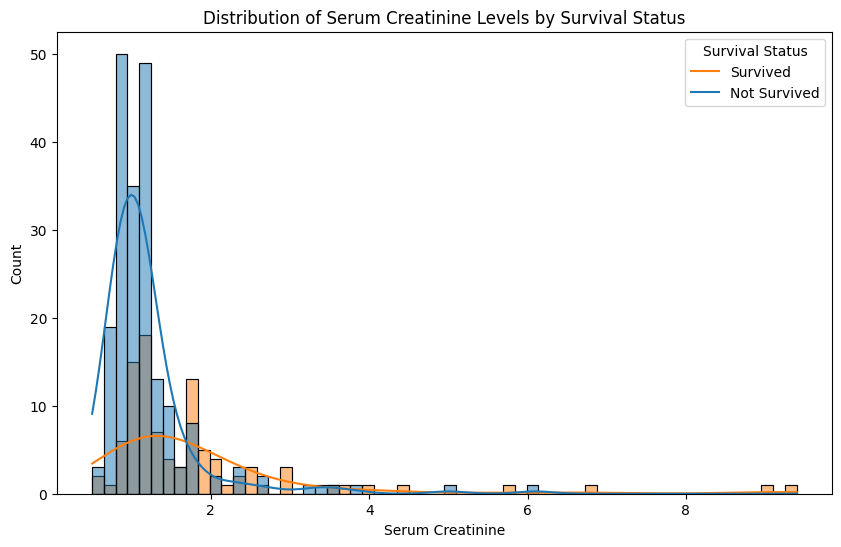

In [26]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', kde=True)
plt.title('Distribution of Serum Creatinine Levels by Survival Status')
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Survived', 'Not Survived'])
plt.show()



- Statistical Test (e.g., t-test)

In [27]:
# Statistical Test (e.g., t-test)
from scipy import stats
t_statistic, p_value = stats.ttest_ind(serum_creatinine_survived, serum_creatinine_not_survived)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -5.306457599754319
P-Value: 2.1901978548979685e-07
